In [1]:
import pandas as pd

In [2]:
BHNames= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']


url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df = pd.read_csv(url, delim_whitespace=True, names=BHNames)

In [3]:
df.shape

(506, 14)

In [4]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Scale data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [11]:
type(scaled)

numpy.ndarray

In [12]:
df_scaled = pd.DataFrame(scaled, columns=BHNames)

In [13]:
df_scaled.shape

(506, 14)

In [14]:
df_scaled.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,0.389618
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,0.267222
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,0.360000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
corr = df_scaled.corr(method='pearson')
print(corr)

             crim        zn     indus  ...     black     lstat      medv
crim     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
zn      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
indus    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
chas    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
nox      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
rm      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
age      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
dis     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
rad      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
tax      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
ptratio  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
black   -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
lstat    0.455621 -0.412995  0.603800  ... -0.36608

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

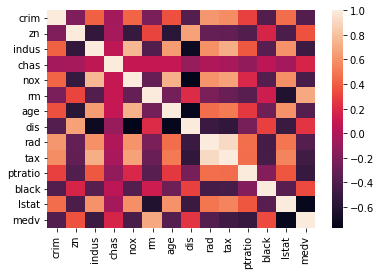

In [19]:
sns.heatmap(corr)

In [39]:
  X = df_scaled.drop('medv', axis='columns')
  y = df_scaled['medv']

  print( X.shape, y.shape)

(506, 13) (506,)


In [40]:
# split dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [43]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=13))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                280       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.0124
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.0149
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.0248
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.0272
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.0297
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.0297
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.0297
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.0297
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.0297
Epoch 10/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.0297
Epoch 11/

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_pred[:4]

array([[0.47621715],
       [0.67394596],
       [0.25826412],
       [0.46812916]], dtype=float32)

In [49]:
y_test[:4]

173    0.413333
274    0.608889
491    0.191111
72     0.395556
Name: medv, dtype: float64

In [50]:
score = model.evaluate(X_test, y_test, verbose=0)

In [51]:
score[0]

0.005898564588278532

In [54]:
# Linear regr model

from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, y_train)

y_pred_lin_reg = LModel.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_lin_reg)
print(mse)

0.011995614555542477
